## Lab 12 Task - Solution

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 

Step 1. 
Load the stock price CSV files for both Apple and Microsoft into separate Pandas DataFrames.

In [2]:
df_apple = pd.read_csv("stock-apple.csv",index_col="date",parse_dates=True)
df_apple.head()

,close,volume,open,high,low
date,,,,,
2017-04-24,143.64,17117710.0,143.50,143.95,143.18
2017-04-21,142.27,17290900.0,142.44,142.68,141.85
2017-04-20,142.44,23294040.0,141.22,142.92,141.16
2017-04-19,140.68,17302160.0,141.88,142.00,140.45
2017-04-18,141.20,14676420.0,141.41,142.04,141.11


In [3]:
df_ms = pd.read_csv("stock-microsoft.csv",index_col="date",parse_dates=True)
df_ms.head()

,close,volume,open,high,low
date,,,,,
2017-04-24,67.53,29721350.0,67.48,67.66,67.10
2017-04-21,66.40,32507090.0,65.67,66.70,65.45
2017-04-20,65.50,22298340.0,65.46,65.75,65.14
2017-04-19,65.04,26983430.0,65.65,65.75,64.89
2017-04-18,65.39,15145300.0,65.33,65.71,65.16


Step 2. For each of the DataFrames, extract only the **close** stock prices for the year 2016. This should give you two new Pandas Series objects.

In [4]:
df_apple_closing = df_apple["close"]["2016"]
df_apple_closing.head()

date
2016-12-30    115.82
2016-12-29    116.73
2016-12-28    116.76
2016-12-27    117.26
2016-12-23    116.52
Name: close, dtype: float64

In [5]:
df_ms_closing = df_ms["close"]["2016"]
df_ms_closing.head()

date
2016-12-30    62.14
2016-12-29    62.90
2016-12-28    62.99
2016-12-27    63.28
2016-12-23    63.24
Name: close, dtype: float64

Step 3. Create a new time series DataFrame with two columns, one for the Apple 2016 closing prices and one for the Microsoft 2016 closing prices.

In [6]:
# stack the two Series vertically as columns
df_combined = pd.concat( [df_apple_closing,df_ms_closing], axis=1 )
# rename the column names
df_combined.columns = ["Apple","Microsoft"]
df_combined.head()

,Apple,Microsoft
date,,
2016-12-30,115.82,62.14
2016-12-29,116.73,62.90
2016-12-28,116.76,62.99
2016-12-27,117.26,63.28
2016-12-23,116.52,63.24


Step 4: Plot the 2016 closing prices for Apple and Microsoft, using a 7-day rolling mean.

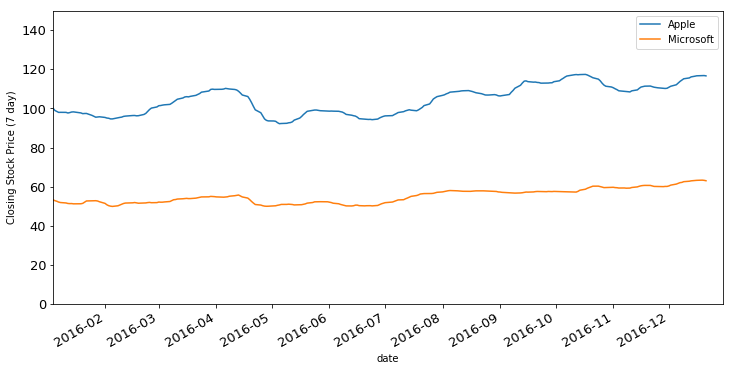

In [7]:
# apply the rolling mean
rm = df_combined.rolling(7).mean()
# create the plot
p = rm.plot(figsize=(12, 6), fontsize=13)
plt.ylabel('Closing Stock Price (7 day)')
plt.ylim([0,150]);

Step 5. Resample the new DataFrame to monthly time windows, and plot the new monthly time series.

In [8]:
# Convert from day frequency to month (M) frequency, by averaging values
df_monthly = df_combined.resample("M").mean()

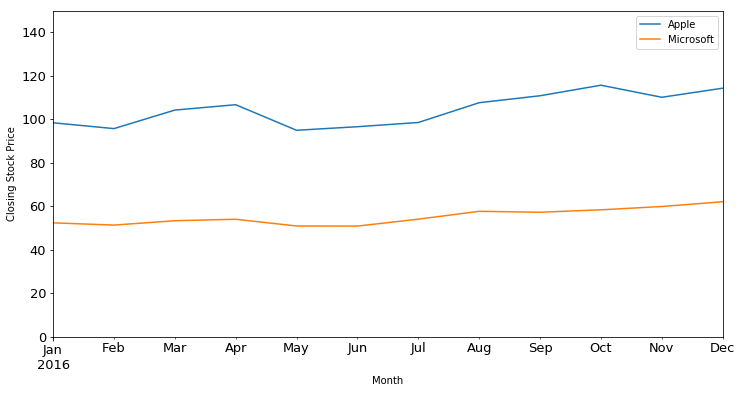

In [9]:
# create the plot
p = df_monthly.plot(figsize=(12, 6), fontsize=13)
plt.ylabel('Closing Stock Price')
plt.ylim([0,150])
plt.xlabel("Month");